In [1]:
import pandas
import pickle
import datetime
import time
import pytz
import numpy as np

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', None)

# START

## LINKS
[ALL STATS](#ALL-STATS)

[LONGS](#LONGS)

[SHORTS](#SHORTS)


# GET INDIVIDUAL STATS BY KEY

In [7]:
long_stats = pandas.read_pickle(f"../output_bucketed_ft/stats_longs.pickle")
short_stats = pandas.read_pickle(f"../output_bucketed_ft/stats_shorts.pickle")

In [18]:
pandas.DataFrame([long_stats.iloc[x] for x in [54834, 80808, 132445, 214151]])

,distance_key,distance_min,distance_max,max_rvol,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
54834,0 -> 0.5,0.00,0.50,3.6,0.0,0.4,0.2,0.500,0.500,0.000,3,66.667,0.0,1.000,-0.000,-0.000
80808,0.5 -> 1.25,0.50,1.25,1.7,0.2,0.4,0.2,0.500,0.500,0.000,7,71.429,0.5,1.250,0.143,0.071
132445,1.25 -> 2.0,1.25,2.00,1.0,0.5,0.5,0.3,0.600,NaN,0.000,3,100.000,1.8,-1.000,NaN,NaN
214151,2.0 -> 10,2.00,10.00,1.8,0.4,0.3,0.4,1.333,1.103,14.286,7,42.857,-0.7,0.828,-0.089,0.062


In [ ]:
pandas.DataFrame([short_stats.iloc[x] for x in [41997, ]])

In [3]:
def summarize_stats(file, distance_points, sort_by='kelly_adj_return'):
    distance_pairs = [*zip(distance_points, distance_points[1:])]
    distance_keys = [f'{x[0]} -> {x[1]}' for x in distance_pairs]

    stats = pandas.read_pickle(f"../output_bucketed_ft/{file}.pickle")
    stats = stats[stats['total_return_r'] > 0]
    stats = stats.sort_values(by=sort_by, ascending=False)

    # Picky downselect
    stats = stats[(stats['profit_factor'] > 2.2) & (stats['target_r'] <= 5)]

    print()
    for distance_key in distance_keys:
        print(distance_key)
        display(stats[stats['distance_key'] == distance_key].head(20))
        print()
        print()
        print()





    r = []
    for distance_key in distance_keys:
        x = stats[stats['distance_key'] == distance_key]
        if x.empty:
            r.append({
                'av_dist': -1,
                'distance_key': distance_key,
                'buffer': -1,
                'stop': -1,
                'target': -1,
                'target_r': -1,
                'win_rate': -1,
                'profit_factor': -1,
                'total_return_r': 0,
                'kelly_adj_return': 0,
                'hit_count': 0
            })
            continue
        xx = x.iloc[0]
        r.append({
            'av_dist': (xx['distance_min'] + xx['distance_max'])/2,
            'distance_key': xx['distance_key'],
            'buffer': xx['buffer'],
            'stop': xx['stop'],
            'target': xx['target'],
            'target_r': xx['target_r'],
            'win_rate': xx['win_rate'],
            'profit_factor': xx['profit_factor'],
            'total_return_r': xx['total_return_r'],
            'kelly_adj_return': xx['kelly_adj_return'],
            'hit_count': xx['hit_count']
        })
    rr = pandas.DataFrame(r)

    display(rr.head(50))


    print()
    kelly_adj_return_sum = rr['kelly_adj_return'].sum()
    total_return_r_sum = rr['total_return_r'].sum()
    hit_count_sum = rr['hit_count'].sum()

    print('SUMMARY OF TOTALS:')
    print(f'kelly_adj_return_sum {kelly_adj_return_sum}')
    print(f'total_return_r_sum {total_return_r_sum}')
    print(f'hit_count_sum {hit_count_sum}')
    print()

    display(rr.plot.scatter(x='av_dist', y='buffer', s=10))
    display(rr.plot.scatter(x='av_dist', y='stop', s=10))
    display(rr.plot.scatter(x='av_dist', y='target', s=10))


# LONGS
[< -- START](#START)


0 -> 0.5


,distance_key,distance_min,distance_max,max_rvol,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
54568,0 -> 0.5,0.0,0.5,3.5,0.5,0.6,0.9,1.500,1.485,0.0,5,60.0,2.48,2.228,0.331,0.820
54569,0 -> 0.5,0.0,0.5,3.5,0.5,0.6,1.0,1.667,1.653,0.0,5,60.0,2.99,2.480,0.358,1.071
54564,0 -> 0.5,0.0,0.5,3.5,0.5,0.6,0.5,0.833,0.830,0.0,5,80.0,2.32,3.320,0.559,1.297
54565,0 -> 0.5,0.0,0.5,3.5,0.5,0.6,0.6,1.000,1.000,0.0,5,80.0,3.00,4.000,0.600,1.800
54523,0 -> 0.5,0.0,0.5,3.5,0.5,0.5,0.3,0.600,0.600,0.0,5,80.0,1.40,2.400,0.467,0.653
54524,0 -> 0.5,0.0,0.5,3.5,0.5,0.5,0.4,0.800,0.800,0.0,5,80.0,2.20,3.200,0.550,1.210
65054,0 -> 0.5,0.0,0.5,4.0,0.5,0.5,0.4,0.800,0.800,0.0,5,80.0,2.20,3.200,0.550,1.210
65053,0 -> 0.5,0.0,0.5,4.0,0.5,0.5,0.3,0.600,0.600,0.0,5,80.0,1.40,2.400,0.467,0.653
54484,0 -> 0.5,0.0,0.5,3.5,0.5,0.4,0.3,0.750,0.750,0.0,5,80.0,2.00,3.000,0.533,1.067
54487,0 -> 0.5,0.0,0.5,3.5,0.5,0.4,0.6,1.500,1.500,0.0,5,60.0,2.50,2.250,0.333,0.833





0.5 -> 1.25


,distance_key,distance_min,distance_max,max_rvol,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
102499,0.5 -> 1.25,0.5,1.25,2.7,0.4,0.2,0.9,4.500,4.500,0.0,12,33.333,10.00,2.250,0.185,1.852
102500,0.5 -> 1.25,0.5,1.25,2.7,0.4,0.2,1.0,5.000,5.000,0.0,12,33.333,12.00,2.500,0.200,2.400
102497,0.5 -> 1.25,0.5,1.25,2.7,0.4,0.2,0.7,3.500,3.500,0.0,12,41.667,10.50,2.500,0.250,2.625
102536,0.5 -> 1.25,0.5,1.25,2.7,0.4,0.3,0.7,2.333,2.307,0.0,12,50.000,7.92,2.307,0.283,2.243
102539,0.5 -> 1.25,0.5,1.25,2.7,0.4,0.3,1.0,3.333,3.302,0.0,12,41.667,9.59,2.358,0.240,2.302
102540,0.5 -> 1.25,0.5,1.25,2.7,0.4,0.3,1.1,3.667,3.639,0.0,12,41.667,11.29,2.599,0.256,2.894
117282,0.5 -> 1.25,0.5,1.25,3.4,0.4,0.3,1.1,3.667,3.639,0.0,12,41.667,11.29,2.599,0.256,2.894
117281,0.5 -> 1.25,0.5,1.25,3.4,0.4,0.3,1.0,3.333,3.302,0.0,12,41.667,9.59,2.358,0.240,2.302
117278,0.5 -> 1.25,0.5,1.25,3.4,0.4,0.3,0.7,2.333,2.307,0.0,12,50.000,7.92,2.307,0.283,2.243
115450,0.5 -> 1.25,0.5,1.25,3.3,0.4,1.0,1.2,1.200,1.200,0.0,12,66.667,5.60,2.400,0.389,2.178





1.25 -> 2.0


,distance_key,distance_min,distance_max,max_rvol,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
173562,1.25 -> 2.0,1.25,2.0,3.0,0.2,0.6,1.4,2.333,2.949,14.286,7,42.857,3.83,2.212,0.235,0.899
173558,1.25 -> 2.0,1.25,2.0,3.0,0.2,0.6,1.0,1.667,2.352,14.286,7,57.143,4.55,3.136,0.389,1.771
173557,1.25 -> 2.0,1.25,2.0,3.0,0.2,0.6,0.9,1.500,2.113,14.286,7,57.143,3.87,2.817,0.369,1.426
173592,1.25 -> 2.0,1.25,2.0,3.0,0.2,0.7,0.5,0.714,0.710,0.000,7,85.714,3.26,4.260,0.656,2.138
173597,1.25 -> 2.0,1.25,2.0,3.0,0.2,0.7,1.0,1.429,2.033,14.286,7,57.143,3.61,2.711,0.361,1.302
173596,1.25 -> 2.0,1.25,2.0,3.0,0.2,0.7,0.9,1.286,1.834,14.286,7,57.143,3.05,2.445,0.338,1.030
173593,1.25 -> 2.0,1.25,2.0,3.0,0.2,0.7,0.6,0.857,1.550,14.286,7,71.429,3.19,3.874,0.530,1.690
173556,1.25 -> 2.0,1.25,2.0,3.0,0.2,0.6,0.8,1.333,1.873,14.286,7,57.143,3.19,2.498,0.343,1.093
173631,1.25 -> 2.0,1.25,2.0,3.0,0.2,0.8,0.5,0.625,0.620,0.000,7,85.714,2.72,3.720,0.627,1.705
173638,1.25 -> 2.0,1.25,2.0,3.0,0.2,0.8,1.2,1.500,2.143,14.286,7,57.143,3.90,2.857,0.371,1.449





2.0 -> 10


,distance_key,distance_min,distance_max,max_rvol,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
260252,2.0 -> 10,2.0,10.0,4.0,0.3,0.6,0.7,1.167,1.060,10.0,10,70.0,4.48,2.474,0.417,1.868
260266,2.0 -> 10,2.0,10.0,4.0,0.3,0.6,2.1,3.500,2.866,10.0,10,50.0,9.44,2.866,0.326,3.073
260265,2.0 -> 10,2.0,10.0,4.0,0.3,0.6,2.0,3.333,2.731,10.0,10,50.0,8.76,2.731,0.317,2.776
260264,2.0 -> 10,2.0,10.0,4.0,0.3,0.6,1.9,3.167,2.605,10.0,10,50.0,8.12,2.605,0.308,2.501
260263,2.0 -> 10,2.0,10.0,4.0,0.3,0.6,1.8,3.000,2.470,10.0,10,50.0,7.44,2.470,0.298,2.214
260262,2.0 -> 10,2.0,10.0,4.0,0.3,0.6,1.7,2.833,2.336,10.0,10,50.0,6.76,2.336,0.286,1.933
260261,2.0 -> 10,2.0,10.0,4.0,0.3,0.6,1.6,2.667,2.209,10.0,10,50.0,6.12,2.209,0.274,1.675
260257,2.0 -> 10,2.0,10.0,4.0,0.3,0.6,1.2,2.000,1.724,10.0,10,60.0,6.44,2.586,0.368,2.370
260256,2.0 -> 10,2.0,10.0,4.0,0.3,0.6,1.1,1.833,1.585,10.0,10,60.0,5.59,2.377,0.348,1.943
260253,2.0 -> 10,2.0,10.0,4.0,0.3,0.6,0.8,1.333,1.195,10.0,10,70.0,5.44,2.789,0.449,2.443


,av_dist,distance_key,buffer,stop,target,target_r,win_rate,profit_factor,total_return_r,kelly_adj_return,hit_count
0,0.250,0 -> 0.5,0.5,0.6,0.9,1.500,60.000,2.228,2.48,0.820,5
1,0.875,0.5 -> 1.25,0.4,0.2,0.9,4.500,33.333,2.250,10.00,1.852,12
2,1.625,1.25 -> 2.0,0.2,0.6,1.4,2.333,42.857,2.212,3.83,0.899,7
3,6.000,2.0 -> 10,0.3,0.6,0.7,1.167,70.000,2.474,4.48,1.868,10



SUMMARY OF TOTALS:
kelly_adj_return_sum 5.439
total_return_r_sum 20.790000000000003
hit_count_sum 34



<AxesSubplot:xlabel='av_dist', ylabel='buffer'>

<AxesSubplot:xlabel='av_dist', ylabel='stop'>

<AxesSubplot:xlabel='av_dist', ylabel='target'>

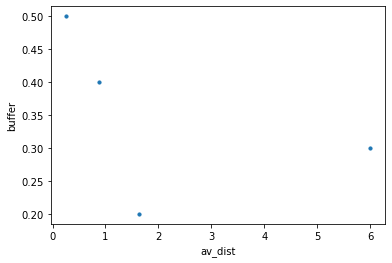

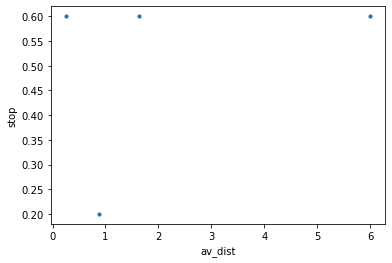

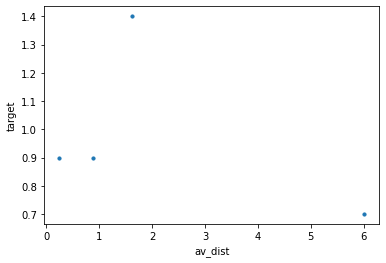

In [4]:
# LONGS
summarize_stats('stats_longs', [0, 0.5, 1.25, 2.0, 10], sort_by='hit_count')

# SHORTS
[< -- START](#START)


0 -> 0.25


,distance_key,distance_min,distance_max,max_rvol,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
21181,0 -> 0.25,0.0,0.25,2.0,0.0,0.5,0.6,1.200,1.200,0.0,3,66.667,1.40,2.400,0.389,0.544
21182,0 -> 0.25,0.0,0.25,2.0,0.0,0.5,0.7,1.400,1.400,0.0,3,66.667,1.80,2.800,0.429,0.771
21183,0 -> 0.25,0.0,0.25,2.0,0.0,0.5,0.8,1.600,1.600,0.0,3,66.667,2.20,3.200,0.458,1.008
21184,0 -> 0.25,0.0,0.25,2.0,0.0,0.5,0.9,1.800,1.800,0.0,3,66.667,2.60,3.600,0.481,1.252
21156,0 -> 0.25,0.0,0.25,2.0,0.0,0.4,2.0,5.000,5.000,0.0,3,33.333,3.00,2.500,0.200,0.600
22114,0 -> 0.25,0.0,0.25,2.0,0.3,0.2,0.3,1.500,1.500,0.0,3,66.667,2.00,3.000,0.444,0.889
21155,0 -> 0.25,0.0,0.25,2.0,0.0,0.4,1.9,4.750,4.750,0.0,3,33.333,2.75,2.375,0.193,0.531
21154,0 -> 0.25,0.0,0.25,2.0,0.0,0.4,1.8,4.500,4.500,0.0,3,33.333,2.50,2.250,0.185,0.463
21301,0 -> 0.25,0.0,0.25,2.0,0.0,0.8,0.9,1.125,1.120,0.0,3,66.667,1.24,2.240,0.369,0.458
21284,0 -> 0.25,0.0,0.25,2.0,0.0,0.7,3.1,4.429,4.430,0.0,3,33.333,2.43,2.215,0.183,0.444





0.25 -> 1.0


,distance_key,distance_min,distance_max,max_rvol,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
112843,0.25 -> 1.0,0.25,1.0,3.2,0.3,0.6,1.8,3.000,2.981,0.0,14,42.857,9.95,2.236,0.237,2.357
112866,0.25 -> 1.0,0.25,1.0,3.2,0.3,0.7,0.2,0.286,0.290,0.0,14,92.857,2.77,3.770,0.682,1.890
112788,0.25 -> 1.0,0.25,1.0,3.2,0.3,0.5,0.2,0.400,0.400,0.0,14,85.714,2.80,2.400,0.500,1.400
112827,0.25 -> 1.0,0.25,1.0,3.2,0.3,0.6,0.2,0.333,0.320,0.0,14,92.857,3.26,4.165,0.706,2.300
112905,0.25 -> 1.0,0.25,1.0,3.2,0.3,0.8,0.2,0.250,0.250,0.0,14,92.857,2.25,3.250,0.643,1.446
111384,0.25 -> 1.0,0.25,1.0,3.1,0.5,0.5,0.2,0.400,0.400,0.0,14,85.714,2.80,2.400,0.500,1.400
111423,0.25 -> 1.0,0.25,1.0,3.1,0.5,0.6,0.2,0.333,0.330,0.0,14,92.857,3.29,4.290,0.712,2.343
111424,0.25 -> 1.0,0.25,1.0,3.1,0.5,0.6,0.3,0.500,0.500,0.0,14,85.714,4.00,3.000,0.571,2.286
111462,0.25 -> 1.0,0.25,1.0,3.1,0.5,0.7,0.2,0.286,0.290,0.0,14,92.857,2.77,3.770,0.682,1.890
111463,0.25 -> 1.0,0.25,1.0,3.1,0.5,0.7,0.3,0.429,0.430,0.0,14,85.714,3.16,2.580,0.525,1.659





1.0 -> 1.75


,distance_key,distance_min,distance_max,max_rvol,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
156089,1.0 -> 1.75,1.0,1.75,2.2,0.0,0.8,1.3,1.625,1.620,0.000,12,58.333,6.34,2.268,0.326,2.068
156083,1.0 -> 1.75,1.0,1.75,2.2,0.0,0.8,0.7,0.875,0.870,0.000,12,75.000,4.83,2.610,0.463,2.235
156082,1.0 -> 1.75,1.0,1.75,2.2,0.0,0.8,0.6,0.750,0.750,0.000,12,75.000,3.75,2.250,0.417,1.562
156080,1.0 -> 1.75,1.0,1.75,2.2,0.0,0.8,0.4,0.500,0.500,0.000,12,91.667,4.50,5.500,0.750,3.375
156079,1.0 -> 1.75,1.0,1.75,2.2,0.0,0.8,0.3,0.375,0.380,0.000,12,91.667,3.18,4.180,0.697,2.218
156044,1.0 -> 1.75,1.0,1.75,2.2,0.0,0.7,0.7,1.000,1.000,0.000,12,75.000,6.00,3.000,0.500,3.000
156043,1.0 -> 1.75,1.0,1.75,2.2,0.0,0.7,0.6,0.857,0.860,0.000,12,75.000,4.74,2.580,0.459,2.177
156041,1.0 -> 1.75,1.0,1.75,2.2,0.0,0.7,0.4,0.571,0.570,0.000,12,91.667,5.27,6.270,0.770,4.060
156040,1.0 -> 1.75,1.0,1.75,2.2,0.0,0.7,0.3,0.429,0.430,0.000,12,91.667,3.73,4.730,0.723,2.696
156039,1.0 -> 1.75,1.0,1.75,2.2,0.0,0.7,0.2,0.286,0.290,0.000,12,91.667,2.19,3.190,0.629,1.378





1.75 -> 10


,distance_key,distance_min,distance_max,max_rvol,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
244416,1.75 -> 10,1.75,10.0,3.3,0.0,0.5,0.5,1.000,1.250,11.111,9,66.667,3.60,2.500,0.400,1.440
244419,1.75 -> 10,1.75,10.0,3.3,0.0,0.5,0.8,1.600,1.882,11.111,9,55.556,4.60,2.353,0.319,1.469
252840,1.75 -> 10,1.75,10.0,3.7,0.0,0.5,0.5,1.000,1.250,11.111,9,66.667,3.60,2.500,0.400,1.440
252843,1.75 -> 10,1.75,10.0,3.7,0.0,0.5,0.8,1.600,1.882,11.111,9,55.556,4.60,2.353,0.319,1.469
244346,1.75 -> 10,1.75,10.0,3.3,0.0,0.3,1.3,4.333,4.534,11.111,9,33.333,7.26,2.267,0.186,1.353
244347,1.75 -> 10,1.75,10.0,3.3,0.0,0.3,1.4,4.667,4.890,11.111,9,33.333,8.28,2.445,0.197,1.631
254871,1.75 -> 10,1.75,10.0,3.8,0.0,0.3,0.8,2.667,2.822,11.111,9,44.444,5.95,2.258,0.248,1.473
254876,1.75 -> 10,1.75,10.0,3.8,0.0,0.3,1.3,4.333,4.534,11.111,9,33.333,7.26,2.267,0.186,1.353
254877,1.75 -> 10,1.75,10.0,3.8,0.0,0.3,1.4,4.667,4.890,11.111,9,33.333,8.28,2.445,0.197,1.631
254868,1.75 -> 10,1.75,10.0,3.8,0.0,0.3,0.5,1.667,1.791,11.111,9,55.556,4.62,2.239,0.307,1.420


,av_dist,distance_key,buffer,stop,target,target_r,win_rate,profit_factor,total_return_r,kelly_adj_return,hit_count
0,0.125,0 -> 0.25,0.0,0.5,0.6,1.200,66.667,2.400,1.40,0.544,3
1,0.625,0.25 -> 1.0,0.3,0.6,1.8,3.000,42.857,2.236,9.95,2.357,14
2,1.375,1.0 -> 1.75,0.0,0.8,1.3,1.625,58.333,2.268,6.34,2.068,12
3,5.875,1.75 -> 10,0.0,0.5,0.5,1.000,66.667,2.500,3.60,1.440,9



SUMMARY OF TOTALS:
kelly_adj_return_sum 6.409000000000001
total_return_r_sum 21.29
hit_count_sum 38



<AxesSubplot:xlabel='av_dist', ylabel='buffer'>

<AxesSubplot:xlabel='av_dist', ylabel='stop'>

<AxesSubplot:xlabel='av_dist', ylabel='target'>

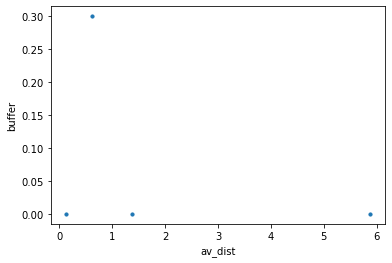

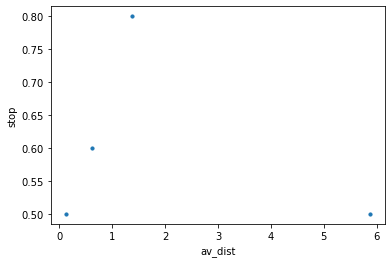

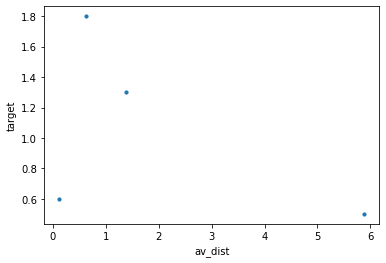

In [5]:
# SHORTS
summarize_stats('stats_shorts', [0, 0.25, 1.00, 1.75, 10], sort_by='hit_count')
# summarize_stats('stats_shorts', distance_points, sort_by='profit_factor')